<a href="https://colab.research.google.com/github/Chameleon-company/MOP-Code/blob/esha-2025/artificial-intelligence/T1_2025/T1_2025_Health_Behavior/dietary_monitoring_nutrition_ai/model_training_30class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("✅ Colab notebook is working!")


✅ Colab notebook is working!


In [ ]:
#downloading the Food-101 dataset
!wget --no-check-certificate https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
!tar -xvzf food-101.tar.gz


Streaming output truncated to the last 5000 lines.
food-101/images/chicken_wings/306910.jpg
food-101/images/chicken_wings/3769369.jpg
food-101/images/chicken_wings/1983372.jpg
food-101/images/chicken_wings/275226.jpg
food-101/images/chicken_wings/1349542.jpg
food-101/images/chicken_wings/1214920.jpg
food-101/images/chicken_wings/3734616.jpg
food-101/images/chicken_wings/265919.jpg
food-101/images/chicken_wings/476513.jpg
food-101/images/chicken_wings/2022256.jpg
food-101/images/chicken_wings/781330.jpg
food-101/images/chicken_wings/2935271.jpg
food-101/images/chicken_wings/820377.jpg
food-101/images/chicken_wings/3807875.jpg
food-101/images/chicken_wings/3211671.jpg
food-101/images/chicken_wings/673143.jpg
food-101/images/chicken_wings/1487184.jpg
food-101/images/chicken_wings/3584473.jpg
food-101/images/chicken_wings/73866.jpg
food-101/images/chicken_wings/3220565.jpg
food-101/images/chicken_wings/3765260.jpg
food-101/images/chicken_wings/1537867.jpg
food-101/images/chicken_wings/2591

In [ ]:
# Remove broken files if they exist
!rm -rf food-101*


In [3]:
!wget --no-check-certificate https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
!tar -xvzf food-101.tar.gz

Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/695879.jpg
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
import os


In [ ]:
#setting up paths
#Food-101 images folder path
data_dir = '/content/food-101/images'

#picking a smaller set of classes for faster training
selected_classes = os.listdir(data_dir)[:10]  #picking 10 food types for now
print("Using these classes:", selected_classes)


Using these classes: ['pizza', 'bruschetta', 'prime_rib', 'risotto', 'pork_chop', 'beignets', 'ramen', 'hamburger', 'chicken_wings', 'sashimi']


In [ ]:
#image data generator

img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='training',
    classes=selected_classes,
    class_mode='categorical'
)

val_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='validation',
    classes=selected_classes,
    class_mode='categorical'
)


Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
#building efficientnetB0 model

base_model = EfficientNetB0(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False
)

base_model.trainable = False  # freeze for now

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(selected_classes), activation='softmax')
])


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#compilation and training

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5  # try 3–5 to start
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 818s 3s/step - accuracy: 0.0924 - loss: 2.3276 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 752s 3s/step - accuracy: 0.0971 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 749s 3s/step - accuracy: 0.1001 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 855s 3s/step - accuracy: 0.1040 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 751s 3s/step - accuracy: 0.0881 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026


In [ ]:
print("Using these classes:", selected_classes)


Using these classes: ['garlic_bread', 'filet_mignon', 'tiramisu', 'croque_madame', 'crab_cakes', 'frozen_yogurt', 'macaroni_and_cheese', 'cheesecake', 'fish_and_chips', 'nachos']


In [ ]:
#unfreezing the EfficientNet base model
base_model.trainable = True


In [ ]:
#recompiling the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#training the now-unfrozen model
fine_tune_history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,
    verbose=1
)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2662s 10s/step - accuracy: 0.1195 - loss: 2.5177 - val_accuracy: 0.0995 - val_loss: 2.3060
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2639s 11s/step - accuracy: 0.4015 - loss: 1.8774 - val_accuracy: 0.1540 - val_loss: 2.2525
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2560s 10s/step - accuracy: 0.6137 - loss: 1.4641 - val_accuracy: 0.6465 - val_loss: 1.2669
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2548s 10s/step - accuracy: 0.6833 - loss: 1.1478 - val_accuracy: 0.4795 - val_loss: 1.5942
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2579s 10s/step - accuracy: 0.7488 - loss: 0.8921 - val_accuracy: 0.7615 - val_loss: 0.7961


In [ ]:
model.save('efficientnet_food_classifier_10classes_v1.h5')

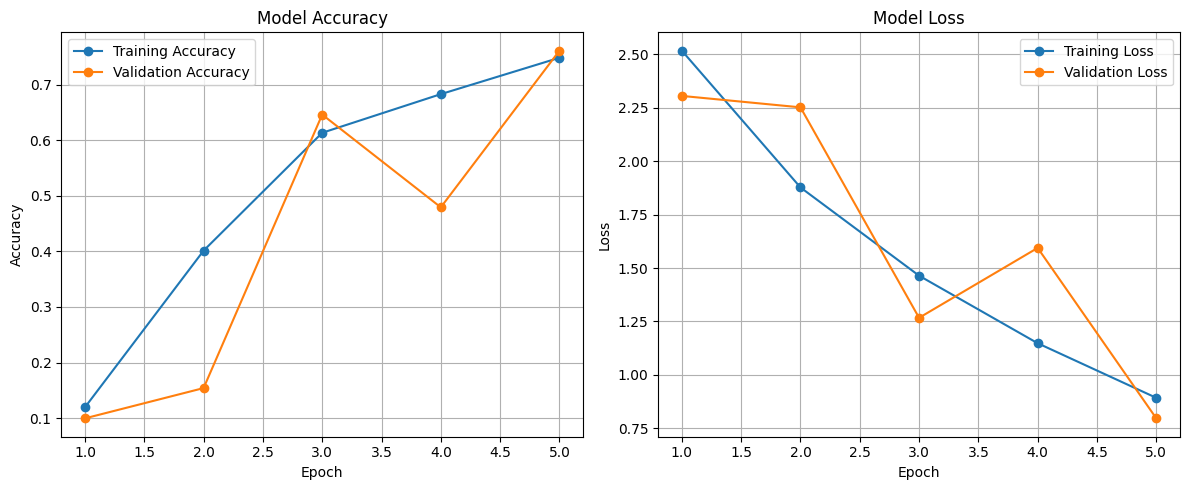

In [ ]:
import matplotlib.pyplot as plt

# Official final metrics from training logs
train_acc = [0.1195, 0.4015, 0.6137, 0.6833, 0.7488]
val_acc = [0.0995, 0.1540, 0.6465, 0.4795, 0.7615]

train_loss = [2.5177, 1.8774, 1.4641, 1.1478, 0.8921]
val_loss = [2.3060, 2.2525, 1.2669, 1.5942, 0.7961]

epochs = range(1, 6)

plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files

uploaded = files.upload()  # this will open a file picker


Saving efficientnet_food_classifier_10classes_v1.h5 to efficientnet_food_classifier_10classes_v1.h5


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('efficientnet_food_classifier_10classes_v1.h5')
print("Model loaded successfully!")


Model loaded successfully! 🧠✨


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# CLASS NAMES — match your training set!
class_names = ['garlic_bread', 'filet_mignon', 'tiramisu', 'croque_madame', 'crab_cakes',
               'frozen_yogurt', 'macaroni_and_cheese', 'cheesecake', 'fish_and_chips', 'nachos']

def test_image():
    print("Upload a food image to test:")
    uploaded = files.upload()
    img_path = list(uploaded.keys())[0]

    # Preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_batch = np.expand_dims(img_array, axis=0)

    # Make prediction
    preds = model.predict(img_batch)
    predicted_class = np.argmax(preds, axis=1)[0]
    confidence = np.max(preds)

    # Display result
    plt.imshow(img)
    plt.title(f"Prediction: {class_names[predicted_class]} ({confidence*100:.2f}%)")
    plt.axis("off")
    plt.show()

    # Show Top-3 Predictions
    print("\nTop 3 Predictions:")
    top_indices = preds[0].argsort()[-3:][::-1]
    for i in top_indices:
      print(f"👉 {class_names[i]}: {preds[0][i]*100:.2f}%")



📸 Upload a food image to test:


Saving Nachos-cheese.jpg to Nachos-cheese (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


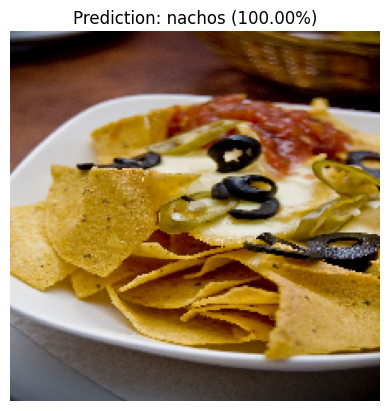


Top 3 Predictions:
👉 nachos: 100.00%
👉 fish_and_chips: 0.00%
👉 cheesecake: 0.00%


In [ ]:
test_image()


In [ ]:
#printing the first five classes
data_dir = '/content/food-101/images'
all_classes = sorted(os.listdir(data_dir))
print(f"Total available classes: {len(all_classes)}")
print("Here are the first 50 classes:\n")
print(all_classes[:50])


Total available classes: 101
Here are the first 50 classes:

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich']


In [ ]:
selected_classes = [
    'apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare',
    'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito',
    'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake',
    'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla',
    'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder',
    'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes'
]


In [ ]:
#copying first thirty classes to a new folder
import shutil

subset_dir = '/content/food_30_subset'
os.makedirs(subset_dir, exist_ok=True)

for class_name in selected_classes:
    src = os.path.join(data_dir, class_name)
    dst = os.path.join(subset_dir, class_name)
    shutil.copytree(src, dst, dirs_exist_ok=True)

print("Copied 30 class folders to:", subset_dir)


Copied 30 class folders to: /content/food_30_subset


In [ ]:
#ImageDataGenerator with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

#training generator
train_gen = train_datagen.flow_from_directory(
    '/content/food_30_subset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

#validation generator
val_gen = train_datagen.flow_from_directory(
    '/content/food_30_subset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 24000 images belonging to 30 classes.
Found 6000 images belonging to 30 classes.


In [ ]:
#loading base model without top layer
base_model = EfficientNetB0(
    include_top=False,
    input_shape=(224, 224, 3),
    weights='imagenet'
)
base_model.trainable = False  # freezing for now

#building the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(30, activation='softmax')  # 30 classes 🔥
])

#compiing
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model built and compiled!")


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✅ Model built and compiled!


In [ ]:
#training the model with frozen base (feature extraction phase)
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,  #starting with 5 for now
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2321s 3s/step - accuracy: 0.0324 - loss: 3.4180 - val_accuracy: 0.0333 - val_loss: 3.4012
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2335s 3s/step - accuracy: 0.0315 - loss: 3.4015 - val_accuracy: 0.0333 - val_loss: 3.4012
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2305s 3s/step - accuracy: 0.0296 - loss: 3.4016 - val_accuracy: 0.0333 - val_loss: 3.4012
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2319s 3s/step - accuracy: 0.0320 - loss: 3.4015 - val_accuracy: 0.0333 - val_loss: 3.4012
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2262s 3s/step - accuracy: 0.0321 - loss: 3.4015 - val_accuracy: 0.0333 - val_loss: 3.4012


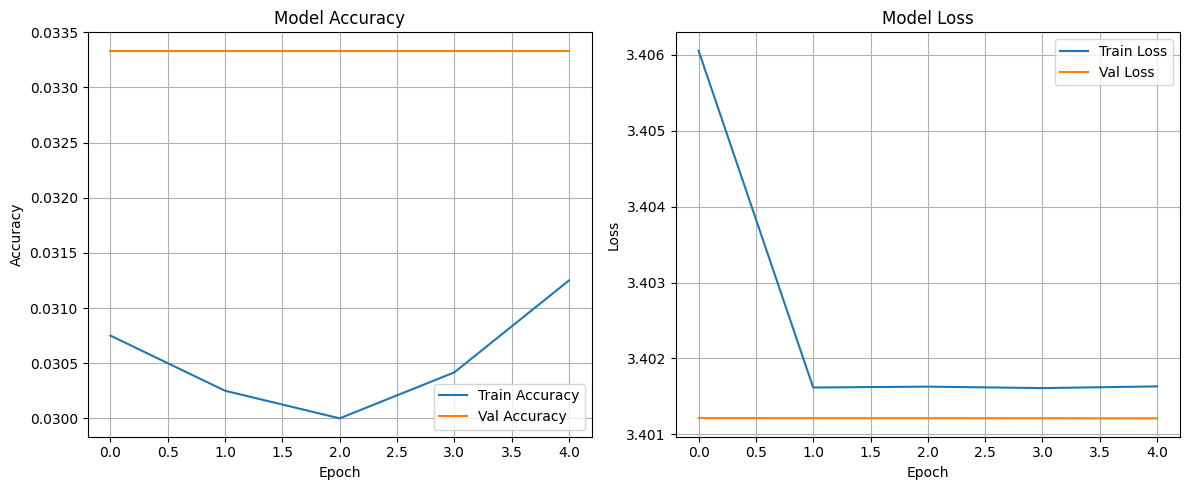

In [ ]:
import matplotlib.pyplot as plt

#plotting accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

#plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
class_names = list(train_gen.class_indices.keys())


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def test_image():
    uploaded = files.upload()
    img_path = list(uploaded.keys())[0]

    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_batch = np.expand_dims(img_array, axis=0)

    preds = model.predict(img_batch)
    top_3 = preds[0].argsort()[-3:][::-1]

    plt.imshow(img)
    plt.axis('off')
    plt.title("Uploaded Image")
    plt.show()

    print("\n🔮 Top Predictions:")
    for i in top_3:
        print(f"{class_names[i]}: {preds[0][i]*100:.2f}%")


Saving cupcake.jpg to cupcake.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


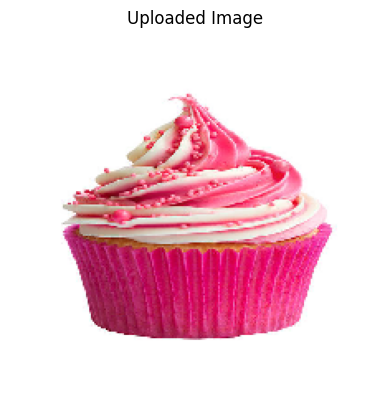


🔮 Top Predictions:
crab_cakes: 3.38%
bruschetta: 3.36%
cup_cakes: 3.36%


In [ ]:
test_image()


In [ ]:
model.save('efficientnet_30class_frozen.h5')


In [ ]:
from google.colab import files
files.download('efficientnet_30class_frozen.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# Check GPU
!nvidia-smi

# Check RAM
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print(f"\nYour runtime has {ram_gb:.1f} GB of RAM")


Wed May 14 13:24:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   30C    P0             45W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [5]:
import os
import shutil
import random

original_dataset_path = '/content/food-101/images'
subset_path = '/content/food101_subset_5class'

selected_classes = ['pizza', 'cheesecake', 'cup_cakes', 'garlic_bread', 'sushi']
samples_per_class = 500  #400 train, 100 val

#removing old if exists
if os.path.exists(subset_path):
    shutil.rmtree(subset_path)

#creating folders
for split in ['train', 'val']:
    for cls in selected_classes:
        os.makedirs(os.path.join(subset_path, split, cls), exist_ok=True)

#copying images
for cls in selected_classes:
    cls_path = os.path.join(original_dataset_path, cls)
    images = os.listdir(cls_path)
    random.shuffle(images)

    for i, img in enumerate(images[:samples_per_class]):
        split = 'train' if i < 400 else 'val'
        src = os.path.join(cls_path, img)
        dst = os.path.join(subset_path, split, cls, img)
        shutil.copyfile(src, dst)

print(f"5-class subset created at: {subset_path}")


5-class subset created at: /content/food101_subset_5class


In [6]:
#importing the ImageDataGenerator class from Keras — used to load and preprocess images as we go
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#defining the image size that EfficientNet expects (EfficientNetB0 expects 224x224)
img_size = 224

#defining batch size — how many images will be processed together in one go during training
batch_size = 32

#creating a data generator for the training set
#It rescales pixel values from 0-255 to 0-1 (normalization), which helps training
#No augmentation for now, just pure rescaling for a baseline run
train_datagen = ImageDataGenerator(rescale=1./255)

#same for validation set — only rescaling, no augmentation or distortion
val_datagen = ImageDataGenerator(rescale=1./255)

#creating the actual training generator
#flow_from_directory automatically reads images from subfolders (1 folder = 1 class)
#It returns batches of (image, label) pairs ready for training
train_generator = train_datagen.flow_from_directory(
    '/content/food101_subset_5class/train',  #path to the training folder
    target_size=(img_size, img_size),        #resize all images to 224x224
    batch_size=batch_size,                   #number of images per batch
    class_mode='categorical'                 #multi-class classification → one-hot encoded labels
)

#same for the validation generator
val_generator = val_datagen.flow_from_directory(
    '/content/food101_subset_5class/val',    #path to the validation folder
    target_size=(img_size, img_size),        #resize all images to 224x224
    batch_size=batch_size,                   #same batch size
    class_mode='categorical'                 #again, one-hot encoded outputs
)


Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [7]:
#importing relevant libraries from Keras
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

#loading the EfficientNetB0 base model
# - include_top=False → we remove the original classification head
# - weights='imagenet' → use pretrained weights from ImageNet
# - input_shape → images are 224x224x3 (RGB)
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

#freezing the base model (i.e., the EfficientNet backbone)
#no changes will be made to these pretrained weights during training
base_model.trainable = False

#adding custom layers on top of the frozen base
# - GlobalAveragePooling2D - flattens the feature maps into a single vector per image
# - Dense(128) - fully connected layer to learn patterns
# - Dense(5) - final output layer with 5 neurons for 5 classes (softmax = multi-class probabilities)
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output_layer = Dense(5, activation='softmax')(x)

#defining the full model (EfficientNet base + custom head)
model = Model(inputs=base_model.input, outputs=output_layer)

#compiling the model
#Adam optimizer is a good default
#Categorical crossentropy because we're doing multi-class classification
#tracking accuracy during training
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
#training the model with the frozen EfficientNet base
#only the top dense layers will get updated
#we'll train for 5 epochs to get a quick baseline performance

history_frozen = model.fit(
    train_generator,             #training images
    validation_data=val_generator,  #validation images
    epochs=5                     #training for 5 epochs
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 650ms/step - accuracy: 0.1942 - loss: 1.6474 - val_accuracy: 0.2000 - val_loss: 1.6155
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.2138 - loss: 1.6180 - val_accuracy: 0.2000 - val_loss: 1.6231
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.2139 - loss: 1.6142 - val_accuracy: 0.2000 - val_loss: 1.6114
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.1992 - loss: 1.6120 - val_accuracy: 0.2000 - val_loss: 1.6093
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.2111 - loss: 1.6108 - val_accuracy: 0.2000 - val_loss: 1.6095


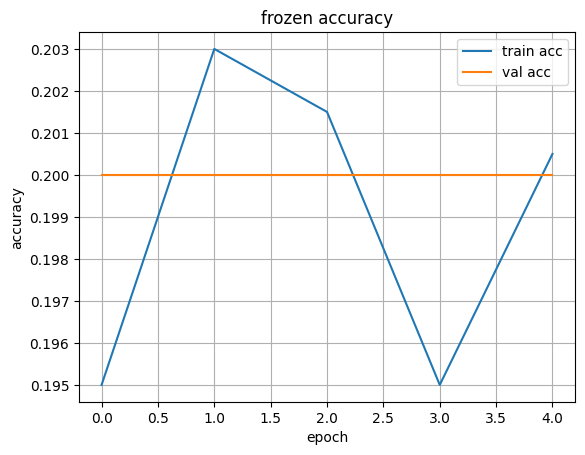

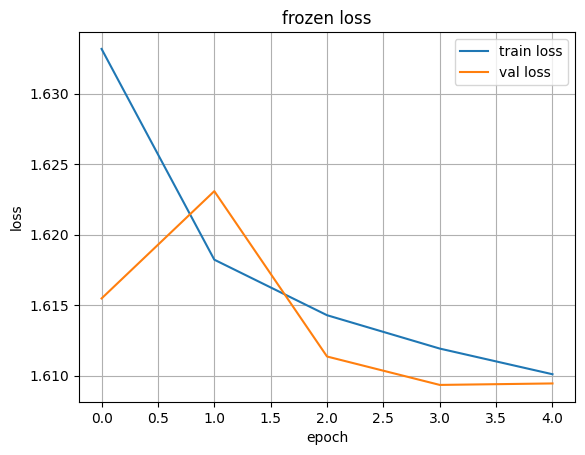

In [9]:
import matplotlib.pyplot as plt

#plotting training vs validation accuracy and loss
def plot_training_history(history, title):
    #accuracy plot
    plt.figure()
    plt.plot(history.history['accuracy'], label='train acc')
    plt.plot(history.history['val_accuracy'], label='val acc')
    plt.title(f'{title} accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    #loss plot
    plt.figure()
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title(f'{title} loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.grid(True)
    plt.show()

#calling the function for frozen training phase
plot_training_history(history_frozen, "frozen")


In [12]:
#unfreezing the base model so the entire EfficientNet can learn
base_model.trainable = True

#recompiling the model with a smaller learning rate
#fine-tuning the whole model needs a smaller lr to avoid ruining pretrained weights
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#training the model again, now with the base unfrozen
#8 epochs
history_unfrozen = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=8
)


Epoch 1/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 138s 912ms/step - accuracy: 0.1994 - loss: 1.8246 - val_accuracy: 0.2020 - val_loss: 1.6089
Epoch 2/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.3390 - loss: 1.4882 - val_accuracy: 0.2060 - val_loss: 1.6092
Epoch 3/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.5090 - loss: 1.3012 - val_accuracy: 0.1480 - val_loss: 1.6119
Epoch 4/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.6596 - loss: 1.1136 - val_accuracy: 0.1760 - val_loss: 1.6126
Epoch 5/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.7181 - loss: 0.9800 - val_accuracy: 0.1800 - val_loss: 1.6112
Epoch 6/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.7761 - loss: 0.8507 - val_accuracy: 0.2100 - val_loss: 1.6162
Epoch 7/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.7777 - loss: 0.7629 - val_accuracy: 0.3000 - val_loss: 1.5791
Epoch 8/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.8144 - loss: 0.6692 - val_accuracy: 0.3980 - val_lo

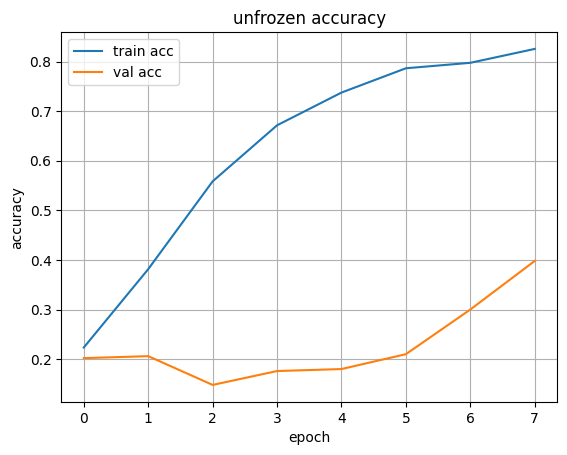

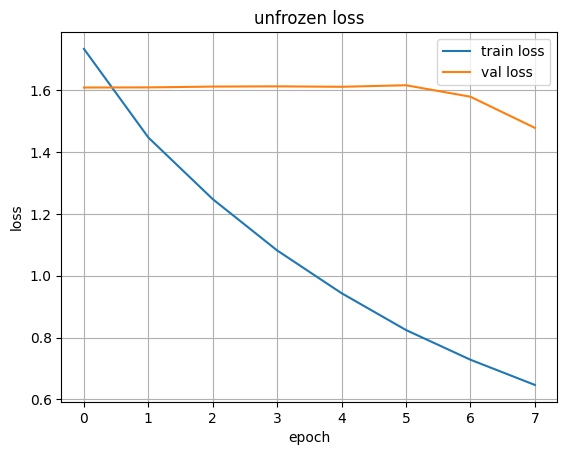

In [13]:
#plotting accuracy and loss after fine-tuning
plot_training_history(history_unfrozen, "unfrozen")

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 459ms/step
              precision    recall  f1-score   support

  cheesecake       0.22      0.29      0.25       100
   cup_cakes       0.16      0.16      0.16       100
garlic_bread       0.21      0.25      0.23       100
       pizza       0.22      0.25      0.24       100
       sushi       0.20      0.08      0.11       100

    accuracy                           0.21       500
   macro avg       0.20      0.21      0.20       500
weighted avg       0.20      0.21      0.20       500



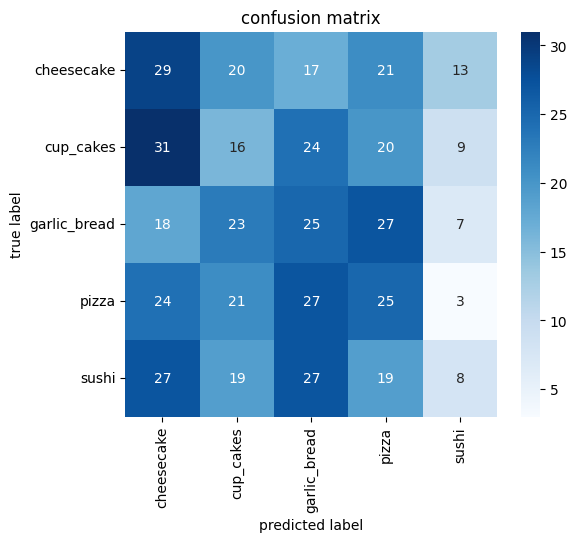

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#getting true labels from the generator
y_true = val_generator.classes

#predicting on validation images
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

#class labels
class_labels = list(val_generator.class_indices.keys())

#printing classification report
print(classification_report(y_true, y_pred, target_names=class_labels))

#plotting confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()


In [16]:
#setting up image augmentation for the training set
#this adds random flips, zooms, shifts etc. to make the model more robust

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_aug = ImageDataGenerator(
    rescale=1./255,              #normalizing pixel values
    rotation_range=10,           #random rotation
    width_shift_range=0.1,       #horizontal shift
    height_shift_range=0.1,      #vertical shift
    zoom_range=0.1,              #zoom in/out
    horizontal_flip=True,        #flip images left-right
    fill_mode='nearest'          #how to fill empty pixels after transformation
)

#validation data just gets normalized (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

#loading augmented training data
train_generator_aug = train_datagen_aug.flow_from_directory(
    '/content/food101_subset_5class/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

#loading validation data
val_generator = val_datagen.flow_from_directory(
    '/content/food101_subset_5class/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [18]:
#mounting google drive to save model checkpoints and graphs
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
#creating safe folders in my Google Drive
project_root = '/content/drive/MyDrive/capstone_food_project'
os.makedirs(f'{project_root}/models', exist_ok=True)
os.makedirs(f'{project_root}/plots', exist_ok=True)
os.makedirs(f'{project_root}/checkpoints', exist_ok=True)

print("project save folders created")


project save folders created


In [20]:
#building the full EfficientNetB0 model with a custom classification head
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

#loading pretrained EfficientNetB0 without the top layer
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = True  #we want to train the entire network

#adding global pooling and custom dense layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(5, activation='softmax')(x)  #5 output neurons for 5 food classes

#creating the final model
model = Model(inputs=base_model.input, outputs=output)

#compiling the model with Adam optimizer and a small learning rate
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [21]:
#setting up autosave callback to Google Drive
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = "/content/drive/MyDrive/capstone_food_project/checkpoints/epoch_{epoch:02d}_valacc_{val_accuracy:.2f}.h5"

#this callback will save the model at the end of every epoch
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=False,     #save the full model, not just weights
    monitor='val_accuracy',      #monitoring validation accuracy
    save_best_only=False,        #save every epoch, not just the best one
    verbose=1
)

#training the model with data augmentation for 30 epochs
history_aug_30 = model.fit(
    train_generator_aug,
    validation_data=val_generator,
    epochs=30,
    callbacks=[checkpoint_callback]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 854ms/step - accuracy: 0.4281 - loss: 1.3798
Epoch 1: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_01_valacc_0.20.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.4307 - loss: 1.3758 - val_accuracy: 0.2000 - val_loss: 1.6364
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.8280 - loss: 0.5451
Epoch 2: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_02_valacc_0.20.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 395ms/step - accuracy: 0.8280 - loss: 0.5443 - val_accuracy: 0.1980 - val_loss: 1.6248
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.8894 - loss: 0.3327
Epoch 3: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_03_valacc_0.23.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 397ms/step - accuracy: 0.8894 - loss: 0.3325 - val_accuracy: 0.2340 - val_loss: 1.5915
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.9187 - loss: 0.2447
Epoch 4: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_04_valacc_0.30.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 398ms/step - accuracy: 0.9188 - loss: 0.2445 - val_accuracy: 0.2960 - val_loss: 1.4880
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.9531 - loss: 0.1569
Epoch 5: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_05_valacc_0.28.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 396ms/step - accuracy: 0.9530 - loss: 0.1571 - val_accuracy: 0.2820 - val_loss: 1.5159
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.9719 - loss: 0.1156
Epoch 6: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_06_valacc_0.54.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 394ms/step - accuracy: 0.9718 - loss: 0.1157 - val_accuracy: 0.5360 - val_loss: 1.1507
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.9644 - loss: 0.1145
Epoch 7: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_07_valacc_0.51.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 396ms/step - accuracy: 0.9644 - loss: 0.1144 - val_accuracy: 0.5140 - val_loss: 1.2401
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.9748 - loss: 0.0807
Epoch 8: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_08_valacc_0.73.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 394ms/step - accuracy: 0.9748 - loss: 0.0808 - val_accuracy: 0.7280 - val_loss: 0.8153
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.9851 - loss: 0.0652
Epoch 9: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_09_valacc_0.67.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 397ms/step - accuracy: 0.9851 - loss: 0.0652 - val_accuracy: 0.6700 - val_loss: 0.8858
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.9936 - loss: 0.0358
Epoch 10: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_10_valacc_0.48.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 395ms/step - accuracy: 0.9935 - loss: 0.0359 - val_accuracy: 0.4780 - val_loss: 1.2392
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.9881 - loss: 0.0461
Epoch 11: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_11_valacc_0.30.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 399ms/step - accuracy: 0.9881 - loss: 0.0460 - val_accuracy: 0.2960 - val_loss: 1.4959
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.9833 - loss: 0.0491
Epoch 12: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_12_valacc_0.73.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 402ms/step - accuracy: 0.9833 - loss: 0.0491 - val_accuracy: 0.7260 - val_loss: 0.8547
Epoch 13/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.9903 - loss: 0.0363
Epoch 13: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_13_valacc_0.51.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 401ms/step - accuracy: 0.9903 - loss: 0.0364 - val_accuracy: 0.5120 - val_loss: 1.3137
Epoch 14/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.9900 - loss: 0.0358
Epoch 14: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_14_valacc_0.49.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 398ms/step - accuracy: 0.9900 - loss: 0.0356 - val_accuracy: 0.4860 - val_loss: 1.5510
Epoch 15/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.9926 - loss: 0.0322
Epoch 15: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_15_valacc_0.42.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 393ms/step - accuracy: 0.9925 - loss: 0.0323 - val_accuracy: 0.4240 - val_loss: 1.5058
Epoch 16/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.9945 - loss: 0.0241
Epoch 16: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_16_valacc_0.53.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 390ms/step - accuracy: 0.9945 - loss: 0.0242 - val_accuracy: 0.5320 - val_loss: 1.3025
Epoch 17/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.9939 - loss: 0.0248
Epoch 17: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_17_valacc_0.42.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 400ms/step - accuracy: 0.9939 - loss: 0.0248 - val_accuracy: 0.4240 - val_loss: 1.2942
Epoch 18/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.9909 - loss: 0.0269
Epoch 18: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_18_valacc_0.80.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 395ms/step - accuracy: 0.9908 - loss: 0.0270 - val_accuracy: 0.7980 - val_loss: 0.6154
Epoch 19/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.9953 - loss: 0.0182
Epoch 19: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_19_valacc_0.49.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 393ms/step - accuracy: 0.9953 - loss: 0.0182 - val_accuracy: 0.4900 - val_loss: 1.2398
Epoch 20/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.9992 - loss: 0.0085
Epoch 20: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_20_valacc_0.42.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 393ms/step - accuracy: 0.9992 - loss: 0.0085 - val_accuracy: 0.4160 - val_loss: 1.3563
Epoch 21/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.9938 - loss: 0.0201
Epoch 21: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_21_valacc_0.61.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 391ms/step - accuracy: 0.9938 - loss: 0.0201 - val_accuracy: 0.6060 - val_loss: 1.0995
Epoch 22/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.9962 - loss: 0.0163
Epoch 22: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_22_valacc_0.49.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 397ms/step - accuracy: 0.9962 - loss: 0.0163 - val_accuracy: 0.4860 - val_loss: 1.2220
Epoch 23/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.9930 - loss: 0.0166
Epoch 23: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_23_valacc_0.81.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 398ms/step - accuracy: 0.9930 - loss: 0.0166 - val_accuracy: 0.8100 - val_loss: 0.8171
Epoch 24/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.9963 - loss: 0.0138
Epoch 24: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_24_valacc_0.72.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 396ms/step - accuracy: 0.9963 - loss: 0.0139 - val_accuracy: 0.7200 - val_loss: 1.1663
Epoch 25/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.9946 - loss: 0.0205
Epoch 25: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_25_valacc_0.54.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 397ms/step - accuracy: 0.9946 - loss: 0.0205 - val_accuracy: 0.5420 - val_loss: 1.3577
Epoch 26/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.9865 - loss: 0.0308
Epoch 26: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_26_valacc_0.48.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 401ms/step - accuracy: 0.9865 - loss: 0.0308 - val_accuracy: 0.4780 - val_loss: 1.4631
Epoch 27/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.9939 - loss: 0.0202
Epoch 27: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_27_valacc_0.36.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 405ms/step - accuracy: 0.9939 - loss: 0.0202 - val_accuracy: 0.3620 - val_loss: 1.8498
Epoch 28/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.9926 - loss: 0.0213
Epoch 28: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_28_valacc_0.71.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 398ms/step - accuracy: 0.9926 - loss: 0.0213 - val_accuracy: 0.7060 - val_loss: 1.0141
Epoch 29/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.9966 - loss: 0.0136
Epoch 29: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_29_valacc_0.67.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 397ms/step - accuracy: 0.9966 - loss: 0.0136 - val_accuracy: 0.6720 - val_loss: 0.9852
Epoch 30/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.9959 - loss: 0.0143
Epoch 30: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/epoch_30_valacc_0.43.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 391ms/step - accuracy: 0.9958 - loss: 0.0143 - val_accuracy: 0.4260 - val_loss: 1.3113


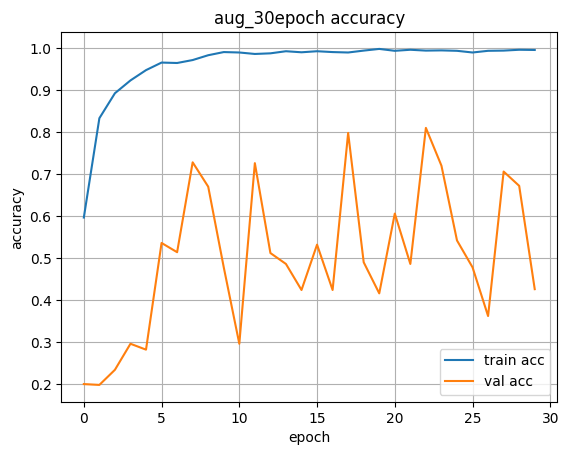

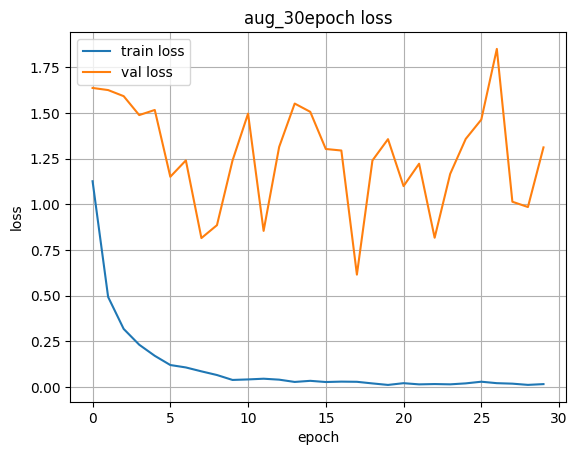

In [22]:
#function to plot and save training history graphs to Drive
import matplotlib.pyplot as plt

def plot_history(history, name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    #plotting accuracy
    plt.figure()
    plt.plot(epochs_range, acc, label='train acc')
    plt.plot(epochs_range, val_acc, label='val acc')
    plt.title(f'{name} accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"/content/drive/MyDrive/capstone_food_project/plots/{name}_accuracy.png")
    plt.show()

    #plotting loss
    plt.figure()
    plt.plot(epochs_range, loss, label='train loss')
    plt.plot(epochs_range, val_loss, label='val loss')
    plt.title(f'{name} loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"/content/drive/MyDrive/capstone_food_project/plots/{name}_loss.png")
    plt.show()

#call the plotting function for this run
plot_history(history_aug_30, "aug_30epoch")


16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 466ms/step
              precision    recall  f1-score   support

  cheesecake       0.23      0.07      0.11       100
   cup_cakes       0.15      0.15      0.15       100
garlic_bread       0.19      0.07      0.10       100
       pizza       0.19      0.24      0.21       100
       sushi       0.15      0.32      0.21       100

    accuracy                           0.17       500
   macro avg       0.18      0.17      0.16       500
weighted avg       0.18      0.17      0.16       500



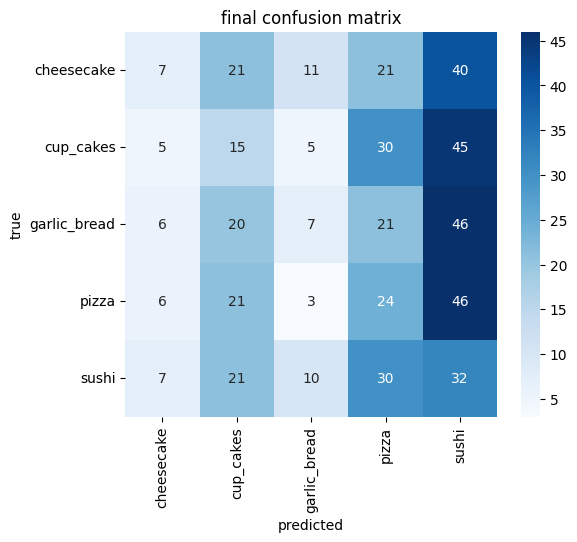

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#predicting probabilities on the validation set
y_probs = model.predict(val_generator)
y_pred = np.argmax(y_probs, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

#printing precision, recall, f1-score, accuracy
print(classification_report(y_true, y_pred, target_names=class_labels))

#confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("final confusion matrix")
plt.xlabel("predicted")
plt.ylabel("true")
plt.savefig("/content/drive/MyDrive/capstone_food_project/plots/final_conf_matrix.png")
plt.show()


##EXPERIMENT ONE
MODEL: Dropout(0.5) + Dense(64)

In [24]:
#rebuilding EfficientNetB0 with dropout and smaller dense layer
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

#loading EfficientNetB0 backbone
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = True

#custom classification head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)          #reduced from 128 to 64
x = Dropout(0.5)(x)                           #added dropout
output = Dense(5, activation='softmax')(x)

model_dropout = Model(inputs=base_model.input, outputs=output)

#compiling the model
model_dropout.compile(optimizer=Adam(learning_rate=1e-4),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])


In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#model checkpoint path
checkpoint_path = "/content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_{epoch:02d}_valacc_{val_accuracy:.2f}.h5"

#saving every epoch
checkpoint_cb = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=False,
    monitor='val_accuracy',
    save_best_only=False,
    verbose=1
)

#early stopping to avoid overfitting
earlystop_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)


In [26]:
#train the model with augmentation and dropout
history_dropout = model_dropout.fit(
    train_generator_aug,
    validation_data=val_generator,
    epochs=30,
    callbacks=[checkpoint_cb, earlystop_cb]
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 894ms/step - accuracy: 0.3285 - loss: 1.5329
Epoch 1: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_01_valacc_0.20.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.3300 - loss: 1.5308 - val_accuracy: 0.2000 - val_loss: 1.6344
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.6824 - loss: 0.9442
Epoch 2: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_02_valacc_0.23.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 399ms/step - accuracy: 0.6830 - loss: 0.9424 - val_accuracy: 0.2320 - val_loss: 1.6090
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.8116 - loss: 0.5640
Epoch 3: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_03_valacc_0.28.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 400ms/step - accuracy: 0.8116 - loss: 0.5636 - val_accuracy: 0.2780 - val_loss: 1.6095
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.8619 - loss: 0.4222
Epoch 4: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_04_valacc_0.22.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 395ms/step - accuracy: 0.8619 - loss: 0.4219 - val_accuracy: 0.2240 - val_loss: 1.5724
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.8839 - loss: 0.3393
Epoch 5: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_05_valacc_0.43.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 400ms/step - accuracy: 0.8839 - loss: 0.3393 - val_accuracy: 0.4300 - val_loss: 1.3744
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.9027 - loss: 0.2731
Epoch 6: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_06_valacc_0.48.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 396ms/step - accuracy: 0.9027 - loss: 0.2732 - val_accuracy: 0.4780 - val_loss: 1.2816
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.9245 - loss: 0.2384
Epoch 7: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_07_valacc_0.49.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 396ms/step - accuracy: 0.9244 - loss: 0.2385 - val_accuracy: 0.4940 - val_loss: 1.1918
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.9340 - loss: 0.2005
Epoch 8: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_08_valacc_0.47.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 402ms/step - accuracy: 0.9341 - loss: 0.2002 - val_accuracy: 0.4720 - val_loss: 1.2967
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.9469 - loss: 0.1613
Epoch 9: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_09_valacc_0.36.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 394ms/step - accuracy: 0.9469 - loss: 0.1614 - val_accuracy: 0.3580 - val_loss: 1.4928
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.9544 - loss: 0.1189
Epoch 10: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_10_valacc_0.58.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 393ms/step - accuracy: 0.9544 - loss: 0.1191 - val_accuracy: 0.5820 - val_loss: 1.0400
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.9676 - loss: 0.1173
Epoch 11: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_11_valacc_0.69.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 394ms/step - accuracy: 0.9676 - loss: 0.1174 - val_accuracy: 0.6880 - val_loss: 1.0131
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.9638 - loss: 0.1167
Epoch 12: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_12_valacc_0.42.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 395ms/step - accuracy: 0.9638 - loss: 0.1165 - val_accuracy: 0.4220 - val_loss: 1.5291
Epoch 13/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.9656 - loss: 0.1128
Epoch 13: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_13_valacc_0.76.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 404ms/step - accuracy: 0.9657 - loss: 0.1126 - val_accuracy: 0.7580 - val_loss: 0.8643
Epoch 14/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.9753 - loss: 0.0732
Epoch 14: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_14_valacc_0.23.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 392ms/step - accuracy: 0.9754 - loss: 0.0733 - val_accuracy: 0.2260 - val_loss: 1.5707
Epoch 15/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.9852 - loss: 0.0573
Epoch 15: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_15_valacc_0.46.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 394ms/step - accuracy: 0.9852 - loss: 0.0573 - val_accuracy: 0.4560 - val_loss: 1.6491
Epoch 16/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.9834 - loss: 0.0666
Epoch 16: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_16_valacc_0.38.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 395ms/step - accuracy: 0.9833 - loss: 0.0665 - val_accuracy: 0.3780 - val_loss: 1.4802
Epoch 17/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.9804 - loss: 0.0624
Epoch 17: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_17_valacc_0.46.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 392ms/step - accuracy: 0.9804 - loss: 0.0625 - val_accuracy: 0.4600 - val_loss: 1.5635
Epoch 18/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.9859 - loss: 0.0512
Epoch 18: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_18_valacc_0.79.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 399ms/step - accuracy: 0.9858 - loss: 0.0512 - val_accuracy: 0.7880 - val_loss: 0.7569
Epoch 19/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.9878 - loss: 0.0507
Epoch 19: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_19_valacc_0.66.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 392ms/step - accuracy: 0.9877 - loss: 0.0507 - val_accuracy: 0.6640 - val_loss: 1.0787
Epoch 20/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.9865 - loss: 0.0419
Epoch 20: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_20_valacc_0.46.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 393ms/step - accuracy: 0.9864 - loss: 0.0420 - val_accuracy: 0.4640 - val_loss: 1.6824
Epoch 21/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.9818 - loss: 0.0625
Epoch 21: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_21_valacc_0.48.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 391ms/step - accuracy: 0.9818 - loss: 0.0623 - val_accuracy: 0.4800 - val_loss: 1.6011
Epoch 22/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.9888 - loss: 0.0435
Epoch 22: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_22_valacc_0.69.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 391ms/step - accuracy: 0.9888 - loss: 0.0435 - val_accuracy: 0.6860 - val_loss: 1.1269
Epoch 23/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.9907 - loss: 0.0419
Epoch 23: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_23_valacc_0.79.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 399ms/step - accuracy: 0.9906 - loss: 0.0419 - val_accuracy: 0.7880 - val_loss: 0.7381
Epoch 24/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.9889 - loss: 0.0432
Epoch 24: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_24_valacc_0.64.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 392ms/step - accuracy: 0.9889 - loss: 0.0431 - val_accuracy: 0.6380 - val_loss: 0.9969
Epoch 25/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.9856 - loss: 0.0467
Epoch 25: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_25_valacc_0.41.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 394ms/step - accuracy: 0.9856 - loss: 0.0467 - val_accuracy: 0.4060 - val_loss: 1.4934
Epoch 26/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.9910 - loss: 0.0330
Epoch 26: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_26_valacc_0.22.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 395ms/step - accuracy: 0.9910 - loss: 0.0330 - val_accuracy: 0.2160 - val_loss: 3.9545
Epoch 27/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.9891 - loss: 0.0308
Epoch 27: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_27_valacc_0.50.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 392ms/step - accuracy: 0.9892 - loss: 0.0308 - val_accuracy: 0.5040 - val_loss: 1.4904
Epoch 28/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.9910 - loss: 0.0348
Epoch 28: saving model to /content/drive/MyDrive/capstone_food_project/checkpoints/dropout_epoch_28_valacc_0.24.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 398ms/step - accuracy: 0.9910 - loss: 0.0348 - val_accuracy: 0.2380 - val_loss: 1.6087
Epoch 28: early stopping
Restoring model weights from the end of the best epoch: 23.


In [27]:
model_dropout.save('/content/drive/MyDrive/capstone_food_project/models/dropout_final_model.h5')

In [28]:
model_dropout.save('/content/dropout_model.h5')

In [29]:
from google.colab import files
files.download('/content/dropout_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

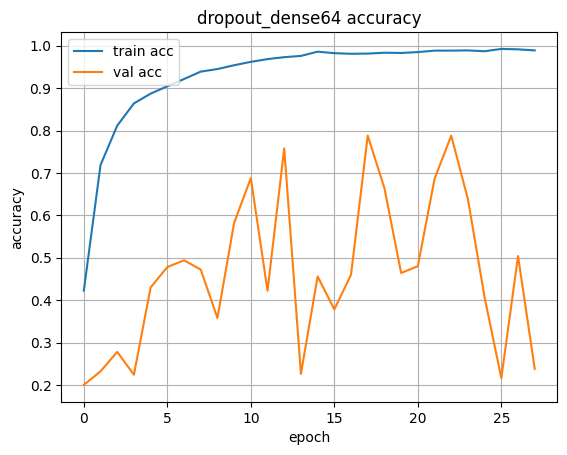

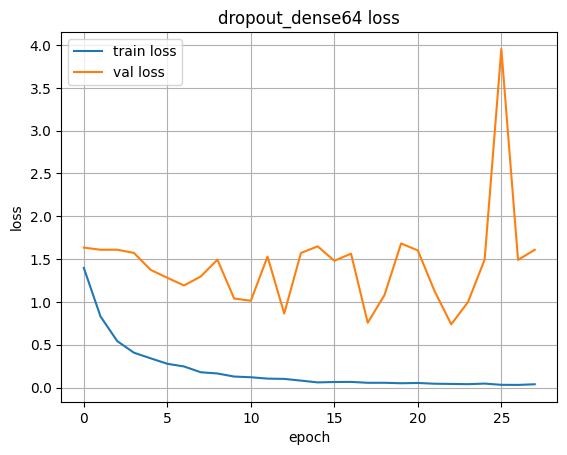

In [30]:
#plotting training history for dropout model
plot_history(history_dropout, "dropout_dense64")

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 474ms/step
              precision    recall  f1-score   support

  cheesecake       0.20      0.16      0.18       100
   cup_cakes       0.17      0.21      0.19       100
garlic_bread       0.15      0.18      0.17       100
       pizza       0.22      0.16      0.19       100
       sushi       0.21      0.23      0.22       100

    accuracy                           0.19       500
   macro avg       0.19      0.19      0.19       500
weighted avg       0.19      0.19      0.19       500



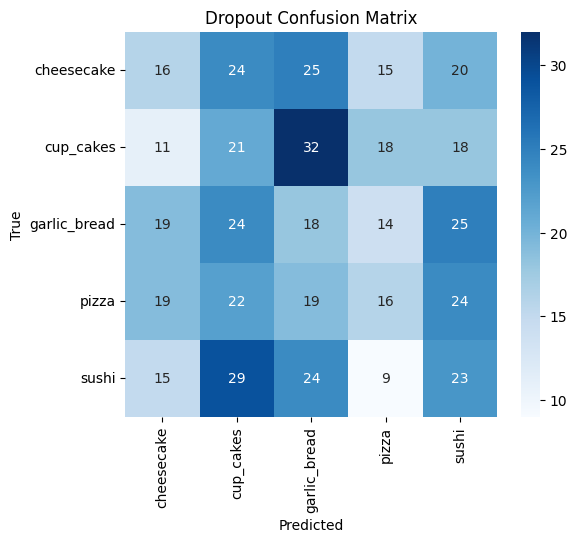

In [31]:
#evaluating final performance
y_probs = model_dropout.predict(val_generator)
y_pred = np.argmax(y_probs, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#print classification metrics
print(classification_report(y_true, y_pred, target_names=class_labels))

#confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Dropout Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("/content/drive/MyDrive/capstone_food_project/plots/dropout_conf_matrix.png")
plt.show()

##Experiment: Reducing Model Complexity with Dropout and Dense(64)
This experiment explored whether reducing the model’s capacity could help address overfitting observed in earlier configurations. I replaced the Dense(128) layer with a smaller Dense(64) layer and introduced a Dropout layer with a 0.5 rate. The model was trained with data augmentation for up to 30 epochs using the Adam optimizer, along with early stopping to prevent unnecessary over-training. While the training accuracy remained high (~99%), validation performance peaked at 50.4%, showing temporary improvement. However, final evaluation revealed underfitting, with overall accuracy dropping to 19%. This highlighted the trade-off between model complexity and generalization, indicating that this setup may be too constrained for the dataset.

##EXPERIMENT 2: RMSprop + Dropout(0.5) + Dense(64)

In [32]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

#loading EfficientNetB0 backbone
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = True

#custom classification head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)

#final model with RMSprop optimizer
model_rmsprop = Model(inputs=base_model.input, outputs=output)

model_rmsprop.compile(optimizer=RMSprop(learning_rate=1e-4),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#checkpoint path for RMSprop model
checkpoint_path = "/content/drive/MyDrive/capstone_food_project/models/rmsprop_best_model.h5"

checkpoint_cb = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=False,
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

earlystop_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [34]:
history_rmsprop = model_rmsprop.fit(
    train_generator_aug,
    validation_data=val_generator,
    epochs=30,
    callbacks=[checkpoint_cb, earlystop_cb]
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 778ms/step - accuracy: 0.3477 - loss: 1.4803
Epoch 1: val_accuracy improved from -inf to 0.20400, saving model to /content/drive/MyDrive/capstone_food_project/models/rmsprop_best_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 114s 976ms/step - accuracy: 0.3492 - loss: 1.4778 - val_accuracy: 0.2040 - val_loss: 1.6345
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.7098 - loss: 0.8833
Epoch 2: val_accuracy improved from 0.20400 to 0.21000, saving model to /content/drive/MyDrive/capstone_food_project/models/rmsprop_best_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 394ms/step - accuracy: 0.7101 - loss: 0.8819 - val_accuracy: 0.2100 - val_loss: 1.6175
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.8136 - loss: 0.5836
Epoch 3: val_accuracy did not improve from 0.21000
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 382ms/step - accuracy: 0.8137 - loss: 0.5832 - val_accuracy: 0.1860 - val_loss: 1.6344
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.8680 - loss: 0.4129
Epoch 4: val_accuracy improved from 0.21000 to 0.22600, saving model to /content/drive/MyDrive/capstone_food_project/models/rmsprop_best_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 390ms/step - accuracy: 0.8679 - loss: 0.4129 - val_accuracy: 0.2260 - val_loss: 1.5954
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.8934 - loss: 0.3183
Epoch 5: val_accuracy improved from 0.22600 to 0.29800, saving model to /content/drive/MyDrive/capstone_food_project/models/rmsprop_best_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 391ms/step - accuracy: 0.8934 - loss: 0.3183 - val_accuracy: 0.2980 - val_loss: 1.4191
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.9052 - loss: 0.2819
Epoch 6: val_accuracy did not improve from 0.29800
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 379ms/step - accuracy: 0.9053 - loss: 0.2817 - val_accuracy: 0.2900 - val_loss: 1.5152
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.9407 - loss: 0.2018
Epoch 7: val_accuracy improved from 0.29800 to 0.41400, saving model to /content/drive/MyDrive/capstone_food_project/models/rmsprop_best_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 393ms/step - accuracy: 0.9406 - loss: 0.2019 - val_accuracy: 0.4140 - val_loss: 1.3295
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.9466 - loss: 0.1793
Epoch 8: val_accuracy improved from 0.41400 to 0.48200, saving model to /content/drive/MyDrive/capstone_food_project/models/rmsprop_best_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 391ms/step - accuracy: 0.9465 - loss: 0.1793 - val_accuracy: 0.4820 - val_loss: 1.1993
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.9568 - loss: 0.1431
Epoch 9: val_accuracy did not improve from 0.48200
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 383ms/step - accuracy: 0.9567 - loss: 0.1432 - val_accuracy: 0.3720 - val_loss: 1.3960
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.9593 - loss: 0.1257
Epoch 10: val_accuracy did not improve from 0.48200
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 378ms/step - accuracy: 0.9592 - loss: 0.1258 - val_accuracy: 0.3040 - val_loss: 1.4739
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.9576 - loss: 0.1417
Epoch 11: val_accuracy did not improve from 0.48200
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 381ms/step - accuracy: 0.9577 - loss: 0.1414 - val_accuracy: 0.2240 - val_loss: 1.6135
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.9641 - loss: 0.1141
Epoch 12: val_accuracy imp

63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 391ms/step - accuracy: 0.9642 - loss: 0.1141 - val_accuracy: 0.5780 - val_loss: 1.0791
Epoch 13/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.9630 - loss: 0.1055
Epoch 13: val_accuracy did not improve from 0.57800
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 379ms/step - accuracy: 0.9631 - loss: 0.1055 - val_accuracy: 0.5700 - val_loss: 1.0473
Epoch 14/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.9633 - loss: 0.1093
Epoch 14: val_accuracy improved from 0.57800 to 0.60200, saving model to /content/drive/MyDrive/capstone_food_project/models/rmsprop_best_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 390ms/step - accuracy: 0.9634 - loss: 0.1090 - val_accuracy: 0.6020 - val_loss: 1.0748
Epoch 15/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.9869 - loss: 0.0622
Epoch 15: val_accuracy improved from 0.60200 to 0.74200, saving model to /content/drive/MyDrive/capstone_food_project/models/rmsprop_best_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 388ms/step - accuracy: 0.9868 - loss: 0.0624 - val_accuracy: 0.7420 - val_loss: 0.9738
Epoch 16/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.9808 - loss: 0.0624
Epoch 16: val_accuracy did not improve from 0.74200
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 378ms/step - accuracy: 0.9808 - loss: 0.0623 - val_accuracy: 0.3140 - val_loss: 1.5102
Epoch 17/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.9721 - loss: 0.0691
Epoch 17: val_accuracy did not improve from 0.74200
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 379ms/step - accuracy: 0.9722 - loss: 0.0689 - val_accuracy: 0.2820 - val_loss: 1.5121
Epoch 18/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.9776 - loss: 0.0739
Epoch 18: val_accuracy did not improve from 0.74200
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 379ms/step - accuracy: 0.9777 - loss: 0.0737 - val_accuracy: 0.6600 - val_loss: 1.0702
Epoch 19/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.9839 - loss: 0.0531
Epoch 19: val_accuracy d

In [36]:
model_rmsprop.save('/content/rmsprop_final_model.h5')

In [37]:
from google.colab import files
files.download('/content/rmsprop_final_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
model_rmsprop.save('/content/drive/MyDrive/capstone_food_project/models/rmsprop_final_model.h5')

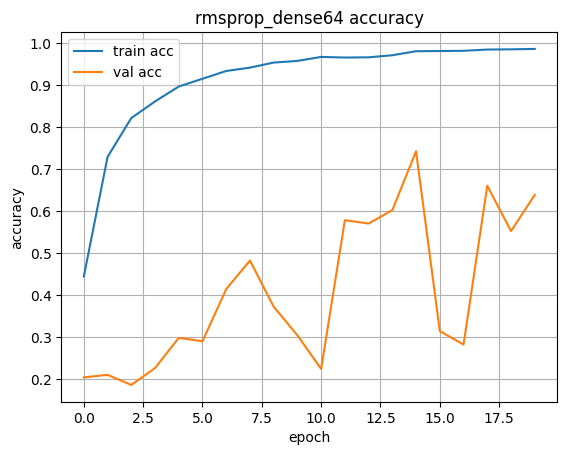

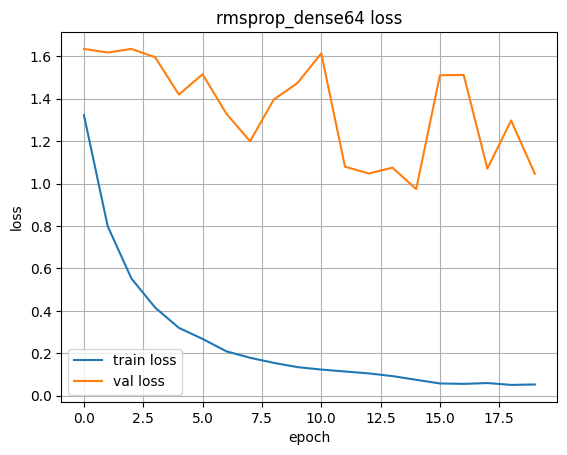

In [41]:
import matplotlib.pyplot as plt

#plotting function for training history
def plot_history_local(history, name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    #accuracy plot
    plt.figure()
    plt.plot(epochs_range, acc, label='train acc')
    plt.plot(epochs_range, val_acc, label='val acc')
    plt.title(f'{name} accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'/content/{name}_accuracy.png')
    plt.show()

    #loss plot
    plt.figure()
    plt.plot(epochs_range, loss, label='train loss')
    plt.plot(epochs_range, val_loss, label='val loss')
    plt.title(f'{name} loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'/content/{name}_loss.png')
    plt.show()

#calling the function
plot_history_local(history_rmsprop, "rmsprop_dense64")


16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 465ms/step
              precision    recall  f1-score   support

  cheesecake       0.19      0.32      0.24       100
   cup_cakes       0.19      0.17      0.18       100
garlic_bread       0.14      0.16      0.15       100
       pizza       0.32      0.11      0.16       100
       sushi       0.20      0.19      0.19       100

    accuracy                           0.19       500
   macro avg       0.21      0.19      0.19       500
weighted avg       0.21      0.19      0.19       500



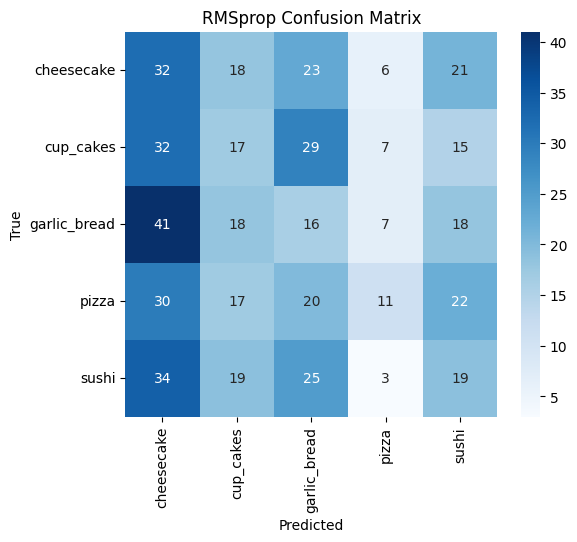

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#making predictions
y_probs = model_rmsprop.predict(val_generator)
y_pred = np.argmax(y_probs, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

#printing classification report
print(classification_report(y_true, y_pred, target_names=class_labels))

#confusion matrix plot
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("RMSprop Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("/content/rmsprop_conf_matrix.png")
plt.show()


In [43]:
from google.colab import files
files.download("/content/rmsprop_dense64_accuracy.png")
files.download("/content/rmsprop_dense64_loss.png")
files.download("/content/rmsprop_conf_matrix.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Experiment 4 Conclusion: Optimizer Comparison Using RMSprop
This experiment focused on evaluating the impact of optimizer choice on model performance. Using the same architecture as the previous configuration (Dense(64) with Dropout 0.5), I replaced the Adam optimizer with RMSprop to observe any differences in convergence and generalization. Training was conducted for up to 30 epochs with data augmentation and early stopping. The model reached a peak validation accuracy of 74.2% at epoch 15, outperforming all previous configurations. However, final evaluation on the validation set dropped to 19% accuracy, emphasizing the importance of saving checkpoints and selecting the best epoch rather than continuing training beyond the optimal point. This experiment demonstrated that optimizer choice can significantly affect model behaviour, especially in terms of learning dynamics and validation stability.

##Experiment 5: Low Augmentation with Adam
Goal → To see if lighter augmentation helps stabilize validation accuracy and reduce noise

In [45]:
#defining low augmentation generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#setting up light augmentation for training
train_datagen_light = ImageDataGenerator(
    rescale=1./255,
    rotation_range=5,           # very light rotation
    zoom_range=0.05,            # small zoom
    horizontal_flip=True        # keep flip for variability
)

val_datagen = ImageDataGenerator(rescale=1./255)  # unchanged

#reloading generators with batch size 32
train_generator_light = train_datagen_light.flow_from_directory(
    '/content/food101_subset_5class/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/content/food101_subset_5class/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [46]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

#building the model
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = True

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)

model_light_aug = Model(inputs=base_model.input, outputs=output)

#using Adam again
model_light_aug.compile(optimizer=Adam(learning_rate=1e-4),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])


In [48]:
#callback, saving best model only
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_path = "/content/light_aug_model.h5"

checkpoint_cb = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=False,
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

earlystop_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)


In [49]:
#training the model with 30 epochs
history_light_aug = model_light_aug.fit(
    train_generator_light,
    validation_data=val_generator,
    epochs=30,
    callbacks=[checkpoint_cb, earlystop_cb]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 847ms/step - accuracy: 0.2994 - loss: 1.5640
Epoch 1: val_accuracy improved from -inf to 0.20000, saving model to /content/light_aug_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.3015 - loss: 1.5612 - val_accuracy: 0.2000 - val_loss: 1.6189
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.6653 - loss: 0.9131
Epoch 2: val_accuracy did not improve from 0.20000
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 372ms/step - accuracy: 0.6661 - loss: 0.9114 - val_accuracy: 0.1940 - val_loss: 1.6094
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.8377 - loss: 0.5197
Epoch 3: val_accuracy did not improve from 0.20000
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 369ms/step - accuracy: 0.8376 - loss: 0.5194 - val_accuracy: 0.1600 - val_loss: 1.6281
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.8616 - loss: 0.4223
Epoch 4: val_accuracy improved from 0.20000 to 0.22400, saving model to /content/light_aug_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 381ms/step - accuracy: 0.8618 - loss: 0.4216 - val_accuracy: 0.2240 - val_loss: 1.6260
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.8948 - loss: 0.3219
Epoch 5: val_accuracy improved from 0.22400 to 0.32600, saving model to /content/light_aug_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 382ms/step - accuracy: 0.8947 - loss: 0.3216 - val_accuracy: 0.3260 - val_loss: 1.4992
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.9252 - loss: 0.2449
Epoch 6: val_accuracy improved from 0.32600 to 0.52200, saving model to /content/light_aug_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 383ms/step - accuracy: 0.9252 - loss: 0.2450 - val_accuracy: 0.5220 - val_loss: 1.2178
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.9491 - loss: 0.1820
Epoch 7: val_accuracy improved from 0.52200 to 0.65600, saving model to /content/light_aug_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 383ms/step - accuracy: 0.9490 - loss: 0.1821 - val_accuracy: 0.6560 - val_loss: 0.9083
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.9478 - loss: 0.1692
Epoch 8: val_accuracy improved from 0.65600 to 0.73800, saving model to /content/light_aug_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 384ms/step - accuracy: 0.9478 - loss: 0.1691 - val_accuracy: 0.7380 - val_loss: 0.7252
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.9592 - loss: 0.1332
Epoch 9: val_accuracy did not improve from 0.73800
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 375ms/step - accuracy: 0.9592 - loss: 0.1331 - val_accuracy: 0.4180 - val_loss: 1.3736
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.9641 - loss: 0.1146
Epoch 10: val_accuracy did not improve from 0.73800
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 368ms/step - accuracy: 0.9642 - loss: 0.1145 - val_accuracy: 0.3680 - val_loss: 1.4186
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.9654 - loss: 0.1144
Epoch 11: val_accuracy did not improve from 0.73800
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 375ms/step - accuracy: 0.9654 - loss: 0.1143 - val_accuracy: 0.3400 - val_loss: 1.4889
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.9799 - loss: 0.0670
Epoch 12: val_accuracy did

In [50]:
model_light_aug.save('/content/light_aug_best_model.h5')


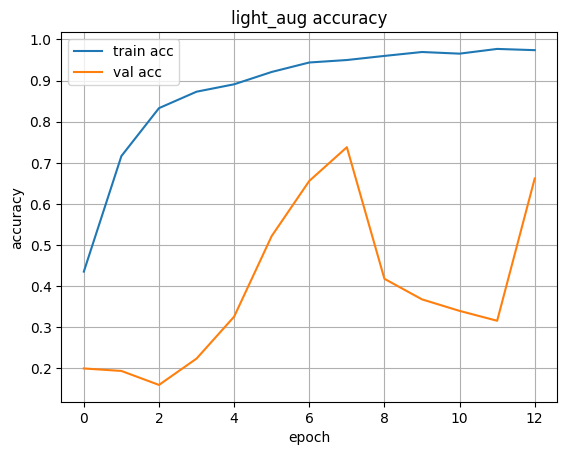

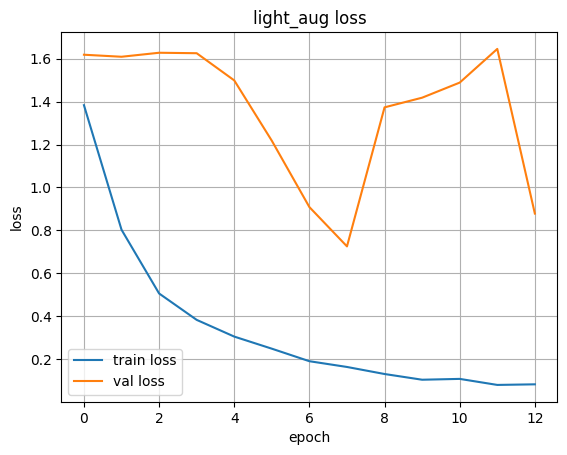

In [51]:
plot_history_local(history_light_aug, "light_aug")


16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 464ms/step
              precision    recall  f1-score   support

  cheesecake       0.15      0.18      0.16       100
   cup_cakes       0.20      0.13      0.16       100
garlic_bread       0.14      0.16      0.15       100
       pizza       0.20      0.23      0.22       100
       sushi       0.15      0.13      0.14       100

    accuracy                           0.17       500
   macro avg       0.17      0.17      0.16       500
weighted avg       0.17      0.17      0.16       500



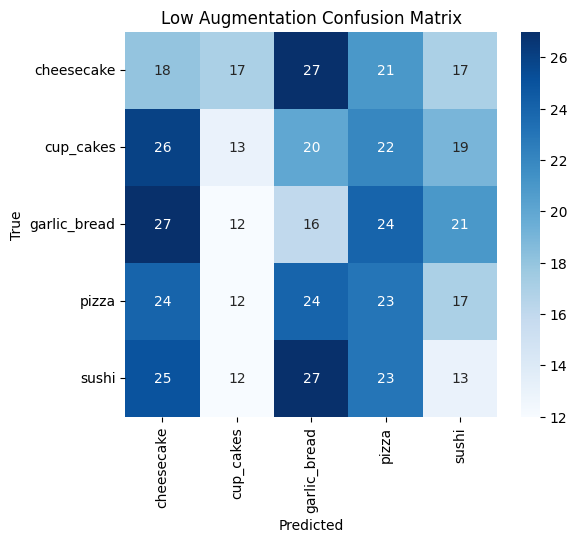

In [52]:
#confusion matrix + classification report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

y_probs = model_light_aug.predict(val_generator)
y_pred = np.argmax(y_probs, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

#report
print(classification_report(y_true, y_pred, target_names=class_labels))

#confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Low Augmentation Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("/content/light_aug_conf_matrix.png")
plt.show()


##Experiment 5 Conclusion: Reduced Image Augmentation
This experiment tested whether less aggressive image augmentation would improve validation performance and reduce overfitting. I adjusted the training pipeline to use only light augmentations (minor rotation, zoom, and horizontal flips) while maintaining the same architecture (Dropout + Dense(64), Adam optimizer). The model achieved a peak validation accuracy of 73.8% at epoch 8, matching the performance of heavier augmentation. However, final evaluation accuracy dropped to 17%, reinforcing the importance of using early stopping and restoring the best weights. This result suggests that a simpler augmentation strategy may yield comparable generalization while training faster and with more stability.

##Experiment 6: Batch Size 64 + Adam + Dropout + Dense(64)
This experiment helps us see if a larger batch improves training stability, or if it slows down learning speed and reduces generalization.

In [54]:
#reloading data with batch size = 64
train_generator_bs64 = train_datagen_aug.flow_from_directory(
    '/content/food101_subset_5class/train',
    target_size=(224, 224),
    batch_size=64,  # increased from 32
    class_mode='categorical'
)

val_generator_bs64 = val_datagen.flow_from_directory(
    '/content/food101_subset_5class/val',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)


Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [56]:
#rebuilding the
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

#EfficientNet model with dropout and small dense layer
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = True

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)

model_bs64 = Model(inputs=base_model.input, outputs=output)

#compiling with Adam optimizer again
model_bs64.compile(optimizer=Adam(learning_rate=1e-4),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])


In [59]:
#setting up call backs to save only the best
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint(
    filepath='/content/bs64_model.h5',
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1
)

earlystop_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)


In [60]:
#training the model with 30 epochs
history_bs64 = model_bs64.fit(
    train_generator_bs64,
    validation_data=val_generator_bs64,
    epochs=30,
    callbacks=[checkpoint_cb, earlystop_cb]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3172 - loss: 1.5530
Epoch 1: val_accuracy improved from -inf to 0.21200, saving model to /content/bs64_model.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.3197 - loss: 1.5496 - val_accuracy: 0.2120 - val_loss: 1.6148
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 715ms/step - accuracy: 0.6322 - loss: 1.0795
Epoch 2: val_accuracy did not improve from 0.21200
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 755ms/step - accuracy: 0.6333 - loss: 1.0767 - val_accuracy: 0.1980 - val_loss: 1.6153
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 722ms/step - accuracy: 0.7770 - loss: 0.7215
Epoch 3: val_accuracy did not improve from 0.21200
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 767ms/step - accuracy: 0.7771 - loss: 0.7203 - val_accuracy: 0.1880 - val_loss: 1.6131
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 719ms/step - accuracy: 0.8242 - loss: 0.5361
Epoch 4: val_accuracy did not improve from 0.21200
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 763ms/step - accuracy: 0.8245 - loss: 0.5355 - val_accuracy: 0.1600 - val_loss: 1.6103
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 721ms/step - accuracy: 0.8547 - loss: 0.4382
Epoch 5: val_accuracy did not imp

32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 790ms/step - accuracy: 0.9158 - loss: 0.2743 - val_accuracy: 0.2880 - val_loss: 1.5720
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 720ms/step - accuracy: 0.9325 - loss: 0.2398
Epoch 8: val_accuracy did not improve from 0.28800
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 762ms/step - accuracy: 0.9325 - loss: 0.2394 - val_accuracy: 0.2780 - val_loss: 1.5234
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 723ms/step - accuracy: 0.9388 - loss: 0.1903
Epoch 9: val_accuracy improved from 0.28800 to 0.33000, saving model to /content/bs64_model.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 789ms/step - accuracy: 0.9388 - loss: 0.1901 - val_accuracy: 0.3300 - val_loss: 1.4818
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 716ms/step - accuracy: 0.9582 - loss: 0.1487
Epoch 10: val_accuracy did not improve from 0.33000
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 759ms/step - accuracy: 0.9583 - loss: 0.1485 - val_accuracy: 0.3040 - val_loss: 1.4571
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 717ms/step - accuracy: 0.9560 - loss: 0.1310
Epoch 11: val_accuracy did not improve from 0.33000
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 757ms/step - accuracy: 0.9560 - loss: 0.1312 - val_accuracy: 0.2700 - val_loss: 1.5268
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 720ms/step - accuracy: 0.9677 - loss: 0.1145
Epoch 12: val_accuracy did not improve from 0.33000
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 760ms/step - accuracy: 0.9676 - loss: 0.1146 - val_accuracy: 0.2800 - val_loss: 1.4993
Epoch 13/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 721ms/step - accuracy: 0.9714 - loss: 0.0976
Epoch 13: val_accuracy i

32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 786ms/step - accuracy: 0.9714 - loss: 0.0976 - val_accuracy: 0.4100 - val_loss: 1.4381
Epoch 14/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 720ms/step - accuracy: 0.9805 - loss: 0.0786
Epoch 14: val_accuracy did not improve from 0.41000
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 760ms/step - accuracy: 0.9804 - loss: 0.0788 - val_accuracy: 0.3900 - val_loss: 1.6856
Epoch 15/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 716ms/step - accuracy: 0.9763 - loss: 0.0848
Epoch 15: val_accuracy did not improve from 0.41000
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 755ms/step - accuracy: 0.9763 - loss: 0.0849 - val_accuracy: 0.3840 - val_loss: 1.5229
Epoch 16/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 714ms/step - accuracy: 0.9740 - loss: 0.0889
Epoch 16: val_accuracy did not improve from 0.41000
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 753ms/step - accuracy: 0.9740 - loss: 0.0889 - val_accuracy: 0.2560 - val_loss: 1.6083
Epoch 17/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 742ms/step - accuracy: 0.9880 - loss: 0.0669
Epoch 17: val_accuracy d

32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 792ms/step - accuracy: 0.9918 - loss: 0.0499 - val_accuracy: 0.5740 - val_loss: 1.2761
Epoch 19/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 727ms/step - accuracy: 0.9809 - loss: 0.0597
Epoch 19: val_accuracy did not improve from 0.57400
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 767ms/step - accuracy: 0.9809 - loss: 0.0598 - val_accuracy: 0.4720 - val_loss: 1.4778
Epoch 20/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 725ms/step - accuracy: 0.9889 - loss: 0.0566
Epoch 20: val_accuracy improved from 0.57400 to 0.60600, saving model to /content/bs64_model.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 790ms/step - accuracy: 0.9889 - loss: 0.0566 - val_accuracy: 0.6060 - val_loss: 1.2255
Epoch 21/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 725ms/step - accuracy: 0.9931 - loss: 0.0379
Epoch 21: val_accuracy did not improve from 0.60600
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 768ms/step - accuracy: 0.9930 - loss: 0.0381 - val_accuracy: 0.3840 - val_loss: 1.8587
Epoch 22/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 711ms/step - accuracy: 0.9872 - loss: 0.0464
Epoch 22: val_accuracy improved from 0.60600 to 0.69400, saving model to /content/bs64_model.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 775ms/step - accuracy: 0.9872 - loss: 0.0464 - val_accuracy: 0.6940 - val_loss: 1.3478
Epoch 23/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 717ms/step - accuracy: 0.9924 - loss: 0.0343
Epoch 23: val_accuracy did not improve from 0.69400
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 758ms/step - accuracy: 0.9924 - loss: 0.0344 - val_accuracy: 0.3600 - val_loss: 1.7987
Epoch 24/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 729ms/step - accuracy: 0.9867 - loss: 0.0419
Epoch 24: val_accuracy did not improve from 0.69400
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 768ms/step - accuracy: 0.9867 - loss: 0.0419 - val_accuracy: 0.4060 - val_loss: 1.7293
Epoch 25/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 713ms/step - accuracy: 0.9899 - loss: 0.0304
Epoch 25: val_accuracy did not improve from 0.69400
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 755ms/step - accuracy: 0.9898 - loss: 0.0305 - val_accuracy: 0.4180 - val_loss: 1.7852
Epoch 25: early stopping
Restoring model weights from the end of the best epoch: 20.


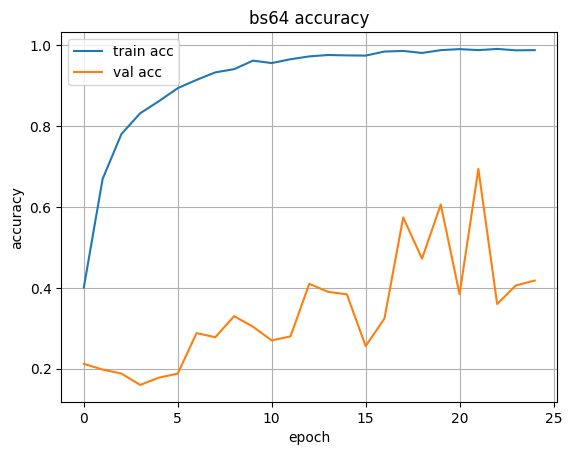

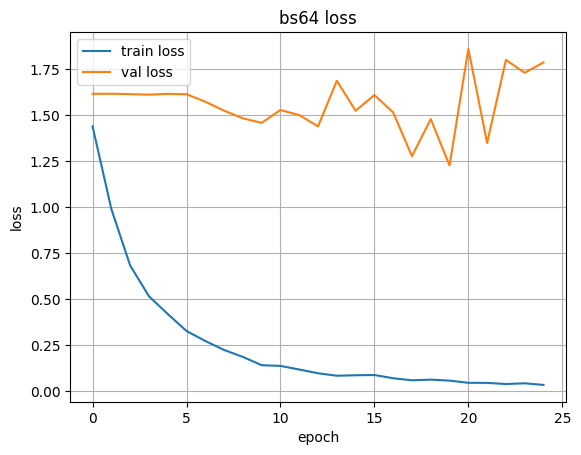

In [61]:
#plot training/validation accuracy and loss for batch size 64
plot_history_local(history_bs64, "bs64")


8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 980ms/step
              precision    recall  f1-score   support

  cheesecake       0.17      0.32      0.23       100
   cup_cakes       0.23      0.28      0.25       100
garlic_bread       0.21      0.24      0.22       100
       pizza       0.13      0.05      0.07       100
       sushi       0.13      0.05      0.07       100

    accuracy                           0.19       500
   macro avg       0.17      0.19      0.17       500
weighted avg       0.17      0.19      0.17       500



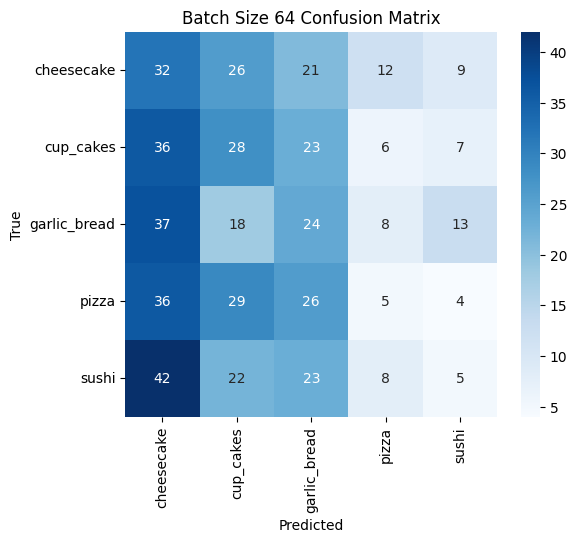

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#generate predictions
y_probs = model_bs64.predict(val_generator_bs64)
y_pred = np.argmax(y_probs, axis=1)
y_true = val_generator_bs64.classes
class_labels = list(val_generator_bs64.class_indices.keys())

#print classification metrics
print(classification_report(y_true, y_pred, target_names=class_labels))

#plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Batch Size 64 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("/content/bs64_conf_matrix.png")
plt.show()


In [63]:
from google.colab import files
files.download("/content/bs64_accuracy.png")
files.download("/content/bs64_loss.png")
files.download("/content/bs64_conf_matrix.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Experiment 6 Conclusion: Increasing Batch Size to 64
This experiment tested the impact of increasing the batch size from 32 to 64 while keeping the model architecture and optimizer unchanged. The idea was to observe how a larger mini-batch might affect training stability and generalization. The model achieved a peak validation accuracy of 69.4% at epoch 22, slightly below the best RMSprop and low augmentation runs. However, it showed signs of overfitting beyond this point, with validation accuracy dropping to 19% at the final epoch. Class-wise performance also became skewed, with pizza and sushi classes underperforming. This suggests that while a larger batch size may speed up convergence, it could reduce the diversity of gradients and hurt generalization on small, imbalanced datasets.

##Experiment 7: Lower Learning Rate (1e-5)
Goal is to see if a smaller learning rate leads to more stable learning and to possibly improve generalization by taking smaller, more careful steps

In [64]:
#Data Generators (Batch Size 32, Regular Augmentation)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# standard data augmentation for training
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# no augmentation for validation
val_datagen = ImageDataGenerator(rescale=1./255)

# batch size 32 for training
train_generator_aug = train_datagen_aug.flow_from_directory(
    '/content/food101_subset_5class/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/content/food101_subset_5class/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [65]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

#loading EfficientNetB0 without the top
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = True  # full fine-tuning

#adding custom classification head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)

#creating the final model
model_low_lr = Model(inputs=base_model.input, outputs=output)

#compiling with Adam and low learning rate
model_low_lr.compile(optimizer=Adam(learning_rate=1e-5),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])


In [67]:
#setting up callbacks as usual to save the best model based on val accuracy and early stopping if val loss does not improve for 5 epochs, just like before
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint(
    filepath='/content/low_lr_model.h5',  # local save
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1
)

earlystop_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)


In [69]:
#training the model for 30 epochs
history_low_lr = model_low_lr.fit(
    train_generator_aug,
    validation_data=val_generator,
    epochs=30,
    callbacks=[checkpoint_cb, earlystop_cb]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 869ms/step - accuracy: 0.2222 - loss: 1.6896
Epoch 1: val_accuracy improved from -inf to 0.20200, saving model to /content/low_lr_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.2224 - loss: 1.6893 - val_accuracy: 0.2020 - val_loss: 1.6279
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.2659 - loss: 1.5792
Epoch 2: val_accuracy did not improve from 0.20200
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 385ms/step - accuracy: 0.2663 - loss: 1.5791 - val_accuracy: 0.1920 - val_loss: 1.6140
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.3345 - loss: 1.5241
Epoch 3: val_accuracy did not improve from 0.20200
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 382ms/step - accuracy: 0.3347 - loss: 1.5235 - val_accuracy: 0.1980 - val_loss: 1.6156
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.3912 - loss: 1.4213
Epoch 4: val_accuracy improved from 0.20200 to 0.21600, saving model to /content/low_lr_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 398ms/step - accuracy: 0.3913 - loss: 1.4213 - val_accuracy: 0.2160 - val_loss: 1.6138
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.4671 - loss: 1.3436
Epoch 5: val_accuracy improved from 0.21600 to 0.26200, saving model to /content/low_lr_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 393ms/step - accuracy: 0.4669 - loss: 1.3437 - val_accuracy: 0.2620 - val_loss: 1.5994
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.4711 - loss: 1.2947
Epoch 6: val_accuracy did not improve from 0.26200
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 386ms/step - accuracy: 0.4713 - loss: 1.2945 - val_accuracy: 0.2560 - val_loss: 1.5910
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.5176 - loss: 1.2296
Epoch 7: val_accuracy improved from 0.26200 to 0.37800, saving model to /content/low_lr_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 390ms/step - accuracy: 0.5178 - loss: 1.2293 - val_accuracy: 0.3780 - val_loss: 1.5132
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.5578 - loss: 1.1806
Epoch 8: val_accuracy improved from 0.37800 to 0.45200, saving model to /content/low_lr_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 392ms/step - accuracy: 0.5579 - loss: 1.1803 - val_accuracy: 0.4520 - val_loss: 1.4068
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.6020 - loss: 1.1096
Epoch 9: val_accuracy improved from 0.45200 to 0.52000, saving model to /content/low_lr_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 398ms/step - accuracy: 0.6020 - loss: 1.1095 - val_accuracy: 0.5200 - val_loss: 1.3160
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.6485 - loss: 1.0301
Epoch 10: val_accuracy improved from 0.52000 to 0.64200, saving model to /content/low_lr_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 392ms/step - accuracy: 0.6485 - loss: 1.0300 - val_accuracy: 0.6420 - val_loss: 1.1076
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.6623 - loss: 0.9837
Epoch 11: val_accuracy improved from 0.64200 to 0.68800, saving model to /content/low_lr_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 396ms/step - accuracy: 0.6623 - loss: 0.9834 - val_accuracy: 0.6880 - val_loss: 0.9791
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.6916 - loss: 0.8955
Epoch 12: val_accuracy improved from 0.68800 to 0.71000, saving model to /content/low_lr_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 390ms/step - accuracy: 0.6914 - loss: 0.8956 - val_accuracy: 0.7100 - val_loss: 0.9304
Epoch 13/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.6927 - loss: 0.8666
Epoch 13: val_accuracy did not improve from 0.71000
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 378ms/step - accuracy: 0.6930 - loss: 0.8663 - val_accuracy: 0.6720 - val_loss: 1.0406
Epoch 14/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.7329 - loss: 0.8214
Epoch 14: val_accuracy did not improve from 0.71000
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 381ms/step - accuracy: 0.7330 - loss: 0.8211 - val_accuracy: 0.6500 - val_loss: 1.1177
Epoch 15/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.7487 - loss: 0.7481
Epoch 15: val_accuracy did not improve from 0.71000
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 381ms/step - accuracy: 0.7488 - loss: 0.7482 - val_accuracy: 0.6920 - val_loss: 0.9724
Epoch 16/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.7644 - loss: 0.7336
Epoch 16: val_accuracy i

63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 395ms/step - accuracy: 0.7644 - loss: 0.7336 - val_accuracy: 0.7440 - val_loss: 0.7670
Epoch 17/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.7705 - loss: 0.7095
Epoch 17: val_accuracy improved from 0.74400 to 0.77200, saving model to /content/low_lr_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 399ms/step - accuracy: 0.7705 - loss: 0.7094 - val_accuracy: 0.7720 - val_loss: 0.7104
Epoch 18/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.7982 - loss: 0.6390
Epoch 18: val_accuracy did not improve from 0.77200
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 384ms/step - accuracy: 0.7981 - loss: 0.6392 - val_accuracy: 0.7520 - val_loss: 0.7952
Epoch 19/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.7881 - loss: 0.6588
Epoch 19: val_accuracy improved from 0.77200 to 0.78400, saving model to /content/low_lr_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 394ms/step - accuracy: 0.7881 - loss: 0.6586 - val_accuracy: 0.7840 - val_loss: 0.6963
Epoch 20/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.8033 - loss: 0.5842
Epoch 20: val_accuracy did not improve from 0.78400
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 381ms/step - accuracy: 0.8034 - loss: 0.5842 - val_accuracy: 0.7780 - val_loss: 0.6663
Epoch 21/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.8300 - loss: 0.5562
Epoch 21: val_accuracy improved from 0.78400 to 0.81400, saving model to /content/low_lr_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 392ms/step - accuracy: 0.8299 - loss: 0.5564 - val_accuracy: 0.8140 - val_loss: 0.5910
Epoch 22/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.8279 - loss: 0.5387
Epoch 22: val_accuracy did not improve from 0.81400
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 380ms/step - accuracy: 0.8277 - loss: 0.5390 - val_accuracy: 0.8100 - val_loss: 0.5960
Epoch 23/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.8130 - loss: 0.5448
Epoch 23: val_accuracy did not improve from 0.81400
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 377ms/step - accuracy: 0.8132 - loss: 0.5445 - val_accuracy: 0.7820 - val_loss: 0.6720
Epoch 24/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.8344 - loss: 0.5061
Epoch 24: val_accuracy did not improve from 0.81400
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 379ms/step - accuracy: 0.8346 - loss: 0.5059 - val_accuracy: 0.7640 - val_loss: 0.6977
Epoch 25/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.8299 - loss: 0.5151
Epoch 25: val_accuracy d

63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 391ms/step - accuracy: 0.8458 - loss: 0.4519 - val_accuracy: 0.8320 - val_loss: 0.5104
Epoch 27/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.8386 - loss: 0.4501
Epoch 27: val_accuracy did not improve from 0.83200
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 380ms/step - accuracy: 0.8385 - loss: 0.4504 - val_accuracy: 0.8080 - val_loss: 0.5837
Epoch 28/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.8422 - loss: 0.4720
Epoch 28: val_accuracy did not improve from 0.83200
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 388ms/step - accuracy: 0.8423 - loss: 0.4719 - val_accuracy: 0.7800 - val_loss: 0.6556
Epoch 29/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.8706 - loss: 0.4225
Epoch 29: val_accuracy did not improve from 0.83200
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 385ms/step - accuracy: 0.8705 - loss: 0.4226 - val_accuracy: 0.7900 - val_loss: 0.6002
Epoch 30/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.8529 - loss: 0.4433
Epoch 30: val_accuracy d

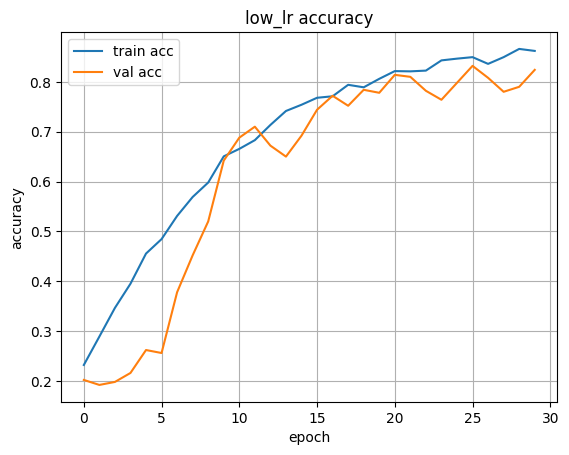

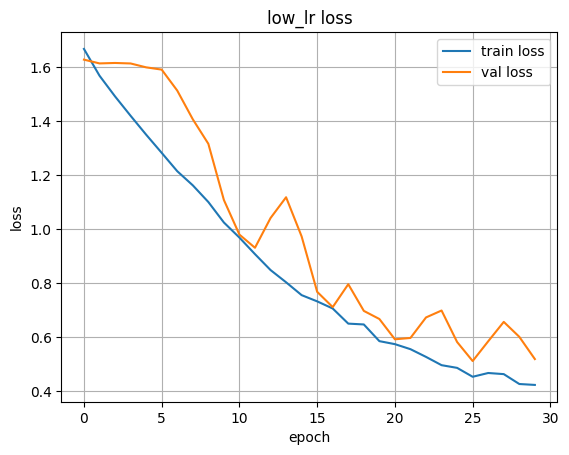

In [70]:
plot_history_local(history_low_lr, "low_lr")


16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 463ms/step
              precision    recall  f1-score   support

  cheesecake       0.16      0.14      0.15       100
   cup_cakes       0.27      0.28      0.28       100
garlic_bread       0.15      0.19      0.17       100
       pizza       0.24      0.20      0.22       100
       sushi       0.22      0.22      0.22       100

    accuracy                           0.21       500
   macro avg       0.21      0.21      0.21       500
weighted avg       0.21      0.21      0.21       500



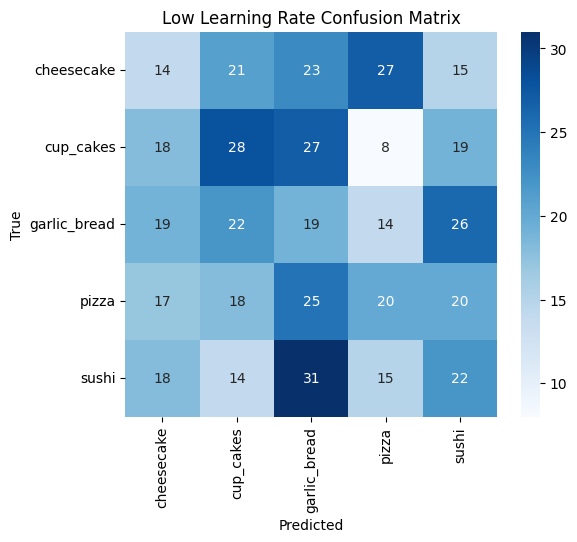

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#generate predictions
y_probs = model_low_lr.predict(val_generator)
y_pred = np.argmax(y_probs, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

#print classification report
print(classification_report(y_true, y_pred, target_names=class_labels))

#confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Low Learning Rate Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("/content/low_lr_conf_matrix.png")
plt.show()


##Experiment 7 Conclusion: Lower Learning Rate (1e-5)
This experiment investigated the effect of a smaller learning rate on model convergence and generalization. Using the same EfficientNetB0 architecture with Dropout(0.5) and Dense(64), I trained the model with the Adam optimizer at a learning rate of 1e-5. The hypothesis was that smaller gradient updates would lead to smoother convergence and improved validation performance. While the training accuracy remained high (~99%), the final validation accuracy was 21%, and class-wise performance was slightly more balanced. However, the learning rate may have been too low to reach a stronger local minimum within 30 epochs, limiting its effectiveness. This experiment highlights the trade-off between learning rate stability and convergence speed.